#### Projet 4 : Anticipez les besoins en consommation de bâtiments

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Analyse exploratoire

In [2]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',46)

In [4]:
df = pd.read_csv('C:/Users/Lynda/Desktop/anticipez les besoins en consommation de batiment/2016_Building_Energy_Benchmarking.csv')
data = df.copy()
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


#### Quelques définitions de columns:
* OSEBuildingID : Un identifiant unique attribué à chaque propriété couverte par la Seattle Benchmarking Ordinance à des fins de suivi et d'identification.

* DataYear : Calendar year (January-December) represented by each data record.

* PrimaryPropertyType: 	L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'usage principal est défini comme une fonction qui représente plus de 50 % d'un bien. Il s'agit du champ Type de propriété - EPA calculée de Portfolio Manager.

* PropertyName : Nom de propriété officiel ou commun tel qu'il est saisi dans le gestionnaire
 de portefeuille de l'EPA.

* PropertyGFATotal : Surface de plancher brute totale du bâtiment et du stationnement.

* PropertyGFAParking : Espace total en pieds carrés de tous les types de stationnement (entièrement fermé, partiellement fermé et ouvert).

* PropertyGFABuilding(s): Espace au sol total en pieds carrés entre les surfaces extérieures des murs d'enceinte d'un bâtiment. Cela comprend toutes les zones à l'intérieur du ou des bâtiments, telles que l'espace des locataires, les espaces communs, les cages d'escalier, les sous-sols, le stockage, etc.

In [5]:
data.shape

(3376, 46)

In [6]:
data.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

### Filtrage sur les batiments résidentiels

In [7]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [8]:
buildingType = ['NonResidential','Nonresidential COS','Nonresidential WA']
data_filtre = data.loc[data['BuildingType'].isin(buildingType)]
data_filtre.shape

(1546, 46)

In [9]:
data_filtre.min()

C:\Users\Lynda\AppData\Local\Temp\ipykernel_6672\769400889.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_filtre.min()


OSEBuildingID                                        1
DataYear                                          2016
BuildingType                            NonResidential
PrimaryPropertyType                Distribution Center
PropertyName                          #4706 Bitterlake
Address                                10 Harrison St.
City                                           Seattle
State                                               WA
ZipCode                                        98006.0
TaxParcelIdentificationNumber               0000000000
CouncilDistrictCode                                  1
Neighborhood                                   BALLARD
Latitude                                      47.50959
Longitude                                   -122.41182
YearBuilt                                         1900
NumberofBuildings                                  0.0
NumberofFloors                                       0
PropertyGFATotal                                 11285
PropertyGF

In [10]:
data_filtre.shape

(1546, 46)

* ce jeu de donnée comporte 3376 lignes et 46 colonnes.
apres le filtrage par des batiments non résidentiel en obient un jeu de donnée de 1546 ligne et 46 colonne.

# Variables quantitatives:

In [11]:
for col in data_filtre.select_dtypes('float','int'):
    print(f'{col :-<50} {data_filtre[col].unique()}')

ZipCode------------------------------------------- [98101. 98121. 98104. 98154. 98105. 98070. 98118. 98107. 98144. 98103.
 98109. 98119. 98136. 98122. 98126. 98133. 98033. 98112. 98115. 98111.
 98134. 98108. 98125. 98117. 98191. 98164. 98195. 98185. 98181. 98102.
 98199. 98168. 98155. 98106. 98006. 98053. 98013. 98116. 98178. 98114.
 98165. 98011. 98146. 98113. 98177. 98020. 98145. 98124.    nan]
Latitude------------------------------------------ [47.6122  47.61317 47.61393 ... 47.59625 47.52832 47.53939]
Longitude----------------------------------------- [-122.33799 -122.33393 -122.3381  ... -122.35784 -122.32431 -122.29536]
NumberofBuildings--------------------------------- [ 1.  3.  0.  2.  4.  6.  9.  5. nan  7.  8.]
LargestPropertyUseTypeGFA------------------------- [ 88434.  83880. 756493. ...   7583.   6601.   8271.]
SecondLargestPropertyUseTypeGFA------------------- [           nan 1.50640000e+04 6.80090000e+04 5.76000000e+04
 2.52000000e+04 4.90000000e+04 4.00000000e+04 8.5000

### variable qualitatives

In [12]:
for col in data_filtre.select_dtypes('object'):
    print(f'{col :-<50} {data_filtre[col].unique()}')

BuildingType-------------------------------------- ['NonResidential' 'Nonresidential COS' 'Nonresidential WA']
PrimaryPropertyType------------------------------- ['Hotel' 'Other' 'Mixed Use Property' 'University'
 'Small- and Mid-Sized Office' 'Self-Storage Facility' 'Warehouse'
 'K-12 School' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Supermarket / Grocery Store' 'Laboratory'
 'Refrigerated Warehouse' 'Restaurant' 'Low-Rise Multifamily' 'Office']
PropertyName-------------------------------------- ['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']
Address------------------------------------------- ['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St']
City---------------------------------------------- ['Seattle']
State-------------

* Valeurs dupliquées:

In [13]:

data_filtre.duplicated().sum()

0

In [14]:
display(data_filtre.head(),
print(f' le shape de data après le filtrage est  : {data_filtre.shape}'),
data_filtre.tail(),data_filtre.describe()
)

 le shape de data après le filtrage est  : (1546, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


None

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,153655.0000,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,116221.0000,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,525251.6875,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,102248.0000,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57
3375,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,2,GREATER DUWAMISH,47.53939,-122.29536,1938,1.0,1,18258,0,18258,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,8271.0,Fitness Center/Health Club/Gym,8000.0,Pre-school/Daycare,1108.0,NaN,NaN,63.099998,70.900002,115.800003,123.900002,1.152896e+06,1.293722e+06,0.0,126774.3984,4.325542e+05,7203.419922,7.203420e+05,False,NaN,Compliant,NaN,41.27,2.26


,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,1546.000000,1546.0,1530.000000,1546.000000,1546.000000,1546.000000,1546.000000,1544.000000,1546.000000,1.546000e+03,1546.000000,1.546000e+03,1.540000e+03,842.000000,345.000000,1006.000000,1543.000000,1543.000000,1544.000000,1544.000000,1.544000e+03,1.543000e+03,1.544000e+03,1.544000e+03,1.544000e+03,1.544000e+03,1.544000e+03,0.0,1544.000000,1544.000000
mean,16599.864812,2016.0,98116.643791,4.416559,47.616220,-122.333388,1961.228978,1.036269,4.283959,1.118044e+05,13822.981889,9.798146e+04,9.044408e+04,35737.319830,13362.514199,63.830020,74.203953,76.585677,181.615026,183.843588,7.642371e+06,7.749996e+06,4.951487e+05,1.590416e+06,5.426501e+06,1.670065e+04,1.670065e+06,NaN,164.746962,1.607506
std,13851.448813,0.0,18.530071,2.192033,0.046790,0.023194,32.913763,0.569231,6.783014,1.915023e+05,43679.918511,1.682204e+05,1.561993e+05,66303.868836,27931.003780,28.915866,75.588468,76.576520,190.144184,190.131202,1.865844e+07,1.882062e+07,5.306124e+06,3.821341e+06,1.303841e+07,5.504752e+04,5.504752e+06,NaN,570.764026,2.245002
min,1.000000,2016.0,98006.000000,1.000000,47.509590,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,610.250000,2016.0,98104.000000,2.000000,47.587825,-122.342725,1929.000000,1.000000,1.000000,2.877000e+04,0.000000,2.770000e+04,2.460000e+04,5325.000000,2635.000000,44.000000,34.250000,36.099998,78.699997,81.000000,1.204670e+06,1.265929e+06,0.000000e+00,2.077251e+05,7.087580e+05,0.000000e+00,0.000000e+00,NaN,19.420000,0.340000
50%,21212.500000,2016.0,98109.000000,4.000000,47.612420,-122.333135,1965.000000,1.000000,2.000000,4.730250e+04,0.000000,4.511350e+04,4.126550e+04,12000.000000,5775.000000,71.000000,53.200001,55.799999,137.750000,140.099998,2.609590e+06,2.739359e+06,0.000000e+00,4.788943e+05,1.633988e+06,4.322415e+03,4.322415e+05,NaN,48.240000,0.850000
75%,24634.500000,2016.0,98125.000000,7.000000,47.648675,-122.322530,1988.000000,1.000000,4.000000,1.029090e+05,0.000000,9.261400e+04,8.873100e+04,31269.250000,12349.000000,89.000000,83.750000,87.400002,210.375004,210.624996,6.968646e+06,7.192840e+06,0.000000e+00,1.469022e+06,5.012304e+06,1.411576e+04,1.411576e+06,NaN,136.272500,1.932500
max,50226.000000,2016.0,98199.000000,7.000000,47.733870,-122.261800,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,686750.000000,303910.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,2.930908e+08,2.966717e+08,1.349435e+08,8.046087e+07,2.745325e+08,1.381912e+06,1.381912e+08,NaN,12307.160000,25.710000


### Visualisation des valeurs manquantes:

<AxesSubplot:>

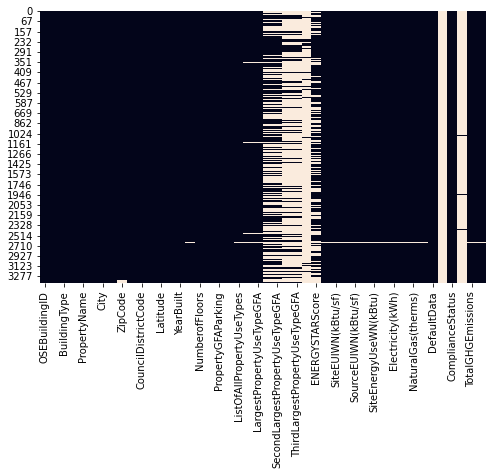

In [15]:
# Les valeurs nulles dans le jeu de donnée:
plt.figure(figsize=(8,5))
sns.heatmap(data_filtre.isna(),cbar = False)

In [16]:
# Porcentage des valeurs manquantes:
(data_filtre.isna().sum()/data_filtre.shape[0]).sort_values(ascending=False)

Comments                           1.000000
Outlier                            0.989651
YearsENERGYSTARCertified           0.941138
ThirdLargestPropertyUseType        0.776843
ThirdLargestPropertyUseTypeGFA     0.776843
SecondLargestPropertyUseType       0.455369
SecondLargestPropertyUseTypeGFA    0.455369
ENERGYSTARScore                    0.349288
ZipCode                            0.010349
LargestPropertyUseType             0.003881
LargestPropertyUseTypeGFA          0.003881
SiteEUIWN(kBtu/sf)                 0.001940
SiteEUI(kBtu/sf)                   0.001940
SiteEnergyUseWN(kBtu)              0.001940
SteamUse(kBtu)                     0.001294
SiteEnergyUse(kBtu)                0.001294
SourceEUIWN(kBtu/sf)               0.001294
SourceEUI(kBtu/sf)                 0.001294
Electricity(kWh)                   0.001294
Electricity(kBtu)                  0.001294
NaturalGas(therms)                 0.001294
NaturalGas(kBtu)                   0.001294
TotalGHGEmissions               

* Des variables avec plus de 80% de valeurs manquantes,
* comment la variable 'Comments','Outliers'...

In [16]:
# Suppression des valeurs manquantes:
data_filtre = data_filtre[data_filtre.columns[data_filtre.isna().sum()/data_filtre.shape[0] <0.8]]
data_filtre.shape


(1546, 43)

Distribution des années de construction des batiments

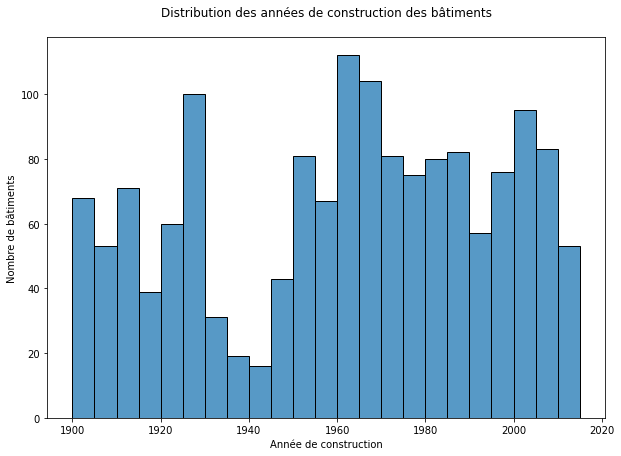

In [17]:
fig = plt.figure(figsize=(10,7))
ax = sns.histplot(data=data_filtre, x='YearBuilt', bins=int((data_filtre.YearBuilt.max() - data_filtre.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n")
plt.show()

* Des variables qui sont suffixé 'WN'
- SiteEUIWN(kBtu/sf) : variable déclinée de SiteEUI(kBtu/sf)
- SiteEnergyUseWN(kBtu) : variable déclinée de SiteEnergyUse(kBtu)
- SourceEUIWN(kBtu/sf) : variable déclinée de SourceEUI(kBtu/sf)

In [18]:
# Je supprime les colonnes qui sont suffixer par WN:
suffix = 'WN'
componant = []
for col in data_filtre.columns:
    if suffix in col: 
        componant.append(col)
print(componant)

data_filtre.drop(columns = componant,axis = 1,inplace = True)
data_filtre.shape


['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']


(1546, 40)

* On regarde la correlation entre les variables:

In [19]:
data_filtre.corr()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,1.000000,NaN,0.146649,-0.187877,0.026071,0.107424,0.022232,-0.020623,-0.265173,-0.313002,-0.230168,-0.296556,-0.289219,-0.224702,-0.156684,-0.044921,-0.012386,-0.053265,-0.201286,-0.039413,-0.236269,-0.236269,-0.085348,-0.085348,0.062030,-0.109626,0.097308
DataYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,0.146649,NaN,1.000000,-0.200165,0.003874,-0.011355,0.093836,0.012846,-0.144598,-0.077262,-0.095799,-0.063056,-0.052484,-0.070243,-0.003612,-0.012109,-0.061195,-0.052402,-0.054219,-0.047193,-0.050331,-0.050331,-0.028072,-0.028072,-0.009387,-0.056261,-0.070307
CouncilDistrictCode,-0.187877,NaN,-0.200165,1.000000,0.510382,-0.348133,-0.026361,-0.035961,0.279520,0.192965,0.193394,0.169455,0.148918,0.203409,0.091796,0.126588,0.069737,0.096109,0.104171,0.007576,0.139206,0.139206,0.018907,0.018907,-0.023971,0.037290,-0.003891
Latitude,0.026071,NaN,0.003874,0.510382,1.000000,-0.089387,0.092930,0.051753,-0.010669,-0.014752,0.038779,-0.026862,-0.017855,0.004047,-0.071476,0.038865,0.095945,0.093696,0.017194,-0.015003,0.007052,0.007052,0.057101,0.057101,-0.046360,0.019606,0.057688
Longitude,0.107424,NaN,-0.011355,-0.348133,-0.089387,1.000000,0.007772,0.077597,-0.008206,0.009477,-0.024373,0.017117,0.023210,0.000609,0.016788,-0.013117,-0.011151,-0.010657,0.029793,0.016956,0.012923,0.012923,0.054600,0.054600,0.053111,0.042193,0.001030
YearBuilt,0.022232,NaN,0.093836,-0.026361,0.092930,0.007772,1.000000,0.033717,0.103982,0.227724,0.293789,0.182956,0.195644,0.263536,0.166944,-0.048245,0.143232,0.177290,0.153426,0.017785,0.181286,0.181286,0.073116,0.073116,-0.011405,0.079084,-0.007624
NumberofBuildings,-0.020623,NaN,0.012846,-0.035961,0.051753,0.077597,0.033717,1.000000,-0.006206,0.169511,-0.028036,0.200249,0.236763,0.203052,-0.041388,-0.029787,0.054772,0.033639,0.407853,0.376632,0.280790,0.280790,0.347147,0.347147,-0.005873,0.492796,0.108087
NumberofFloors,-0.265173,NaN,-0.144598,0.279520,-0.010669,-0.008206,0.103982,-0.006206,1.000000,0.677521,0.501767,0.641002,0.645126,0.527733,0.351358,0.147682,0.015642,0.054801,0.390685,0.104411,0.486518,0.486518,0.071866,0.071866,-0.032062,0.189213,-0.054751
PropertyGFATotal,-0.313002,NaN,-0.077262,0.192965,-0.014752,0.009477,0.227724,0.169511,0.677521,1.000000,0.614655,0.978800,0.951053,0.828216,0.638281,0.141730,0.038923,0.065388,0.638535,0.293025,0.678880,0.678880,0.272140,0.272140,-0.034724,0.457778,-0.035170


<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='TotalGHGEmissions'>

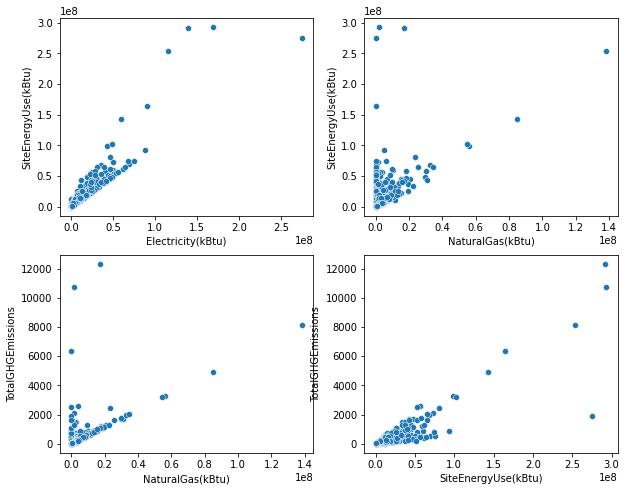

In [20]:
fig, ax = plt.subplots(2, 2, figsize=[10, 8])
sns.scatterplot(x = 'Electricity(kBtu)', y ='SiteEnergyUse(kBtu)', data = data_filtre, ax = ax[0,0])
sns.scatterplot(x = 'NaturalGas(kBtu)', y ='SiteEnergyUse(kBtu)', data = data_filtre,ax = ax[0,1])
sns.scatterplot(x = 'NaturalGas(kBtu)', y ='TotalGHGEmissions', data = data_filtre,ax = ax[1,0])
sns.scatterplot(x = 'SiteEnergyUse(kBtu)', y ='TotalGHGEmissions', data = data_filtre,ax = ax[1,1])

On veut se passer des relevés de consommation, donc on supprime les colonnes issues de relevés.
* et comme on trouve une forte corrélation entre ses variables.
'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)'

Pour la modélisation, nous pouvons écarter les variables suivantes pour simplifier la modélisation : 
- PropertyName
- Adress
- State
- LargestPropertyUseType
- SecondLargestPropertyUseType
- ThirdLargestPropertyUseType
- YearsENERGYSTARCertified

In [21]:
#Je supprime les colonnes qui ne sont pas pertinente pour notre analyse :

liste_column = ['State','ZipCode','Address','DefaultData','City','NaturalGas(therms)',
'Electricity(kWh)','OSEBuildingID','DataYear','GHGEmissionsIntensity','SiteEUI(kBtu/sf)',
'SourceEUI(kBtu/sf)','SteamUse(kBtu)','Electricity(kBtu)','PropertyName','NaturalGas(kBtu)',
'TaxParcelIdentificationNumber','CouncilDistrictCode','YearBuilt','ComplianceStatus']

data_filtre.drop(columns = liste_column, axis = 1, inplace = True)
data_filtre.shape


(1546, 20)

In [22]:
data_filtre.describe()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1546.000000,1546.000000,1544.000000,1546.000000,1.546000e+03,1546.000000,1.546000e+03,1.540000e+03,842.000000,345.000000,1006.000000,1.544000e+03,1544.000000
mean,47.616220,-122.333388,1.036269,4.283959,1.118044e+05,13822.981889,9.798146e+04,9.044408e+04,35737.319830,13362.514199,63.830020,7.642371e+06,164.746962
std,0.046790,0.023194,0.569231,6.783014,1.915023e+05,43679.918511,1.682204e+05,1.561993e+05,66303.868836,27931.003780,28.915866,1.865844e+07,570.764026
min,47.509590,-122.411820,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,-0.800000
25%,47.587825,-122.342725,1.000000,1.000000,2.877000e+04,0.000000,2.770000e+04,2.460000e+04,5325.000000,2635.000000,44.000000,1.204670e+06,19.420000
50%,47.612420,-122.333135,1.000000,2.000000,4.730250e+04,0.000000,4.511350e+04,4.126550e+04,12000.000000,5775.000000,71.000000,2.609590e+06,48.240000
75%,47.648675,-122.322530,1.000000,4.000000,1.029090e+05,0.000000,9.261400e+04,8.873100e+04,31269.250000,12349.000000,89.000000,6.968646e+06,136.272500
max,47.733870,-122.261800,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,1.680937e+06,686750.000000,303910.000000,100.000000,2.930908e+08,12307.160000


In [23]:
# je filtre la colonne emission d'energie en fonction des données positives, je supprimes les emission negative
data_filtre = data_filtre[data_filtre['TotalGHGEmissions']>0]

In [24]:
data_filtre.isna().sum()

BuildingType                          0
PrimaryPropertyType                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        700
SecondLargestPropertyUseTypeGFA     700
ThirdLargestPropertyUseType        1196
ThirdLargestPropertyUseTypeGFA     1196
ENERGYSTARScore                     536
SiteEnergyUse(kBtu)                   0
TotalGHGEmissions                     0
dtype: int64

In [25]:
# On vois deux lignes qui ont aucune information soit par emission au soit par energie , donc l'impultation ça peut poser des problèmes, je supprime ses valeurs:

data_filtre = data_filtre[~data_filtre['LargestPropertyUseType'].isna()]
data_filtre.shape

(1536, 20)

* des données non implulté

* Remplacer les données np.nan par categories "null ou no appliquable:

In [26]:
# remplacer les valeurs nan par 0 pour les variables numeriques:
for column in data_filtre.select_dtypes('float').iloc[:,3:6]:
    data_filtre[column] = data_filtre[column].replace(np.nan , 0)

In [27]:
# remplacer les valeurs nan par NULL pour les variables categorielles:
for column in data_filtre.select_dtypes('object'):
    data_filtre[column] = data_filtre[column].replace(np.nan , 'No information')

ListOfAllPropertyUseTypes contient 375 valeurs distinctes ce qui est beaucoup. On va donc simplement compter le nombre d'utilisations distinctes et remplacer ces valeurs par la longeur de chaque ligne.

In [28]:
# Transformer la colonne en numerque :
data_filtre['NumberOfPropreTypeUse'] = data_filtre['ListOfAllPropertyUseTypes'].apply(lambda x: len(x))
data_filtre.drop('ListOfAllPropertyUseTypes',axis = 1,inplace = True)

In [29]:
data_filtre.isna().sum()

BuildingType                         0
PrimaryPropertyType                  0
Neighborhood                         0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFATotal                     0
PropertyGFAParking                   0
PropertyGFABuilding(s)               0
LargestPropertyUseType               0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseType         0
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseType          0
ThirdLargestPropertyUseTypeGFA       0
ENERGYSTARScore                    534
SiteEnergyUse(kBtu)                  0
TotalGHGEmissions                    0
NumberOfPropreTypeUse                0
dtype: int64

#### Detection des outliers:

Text(0.5, 1.0, 'PropertyGFATotal')

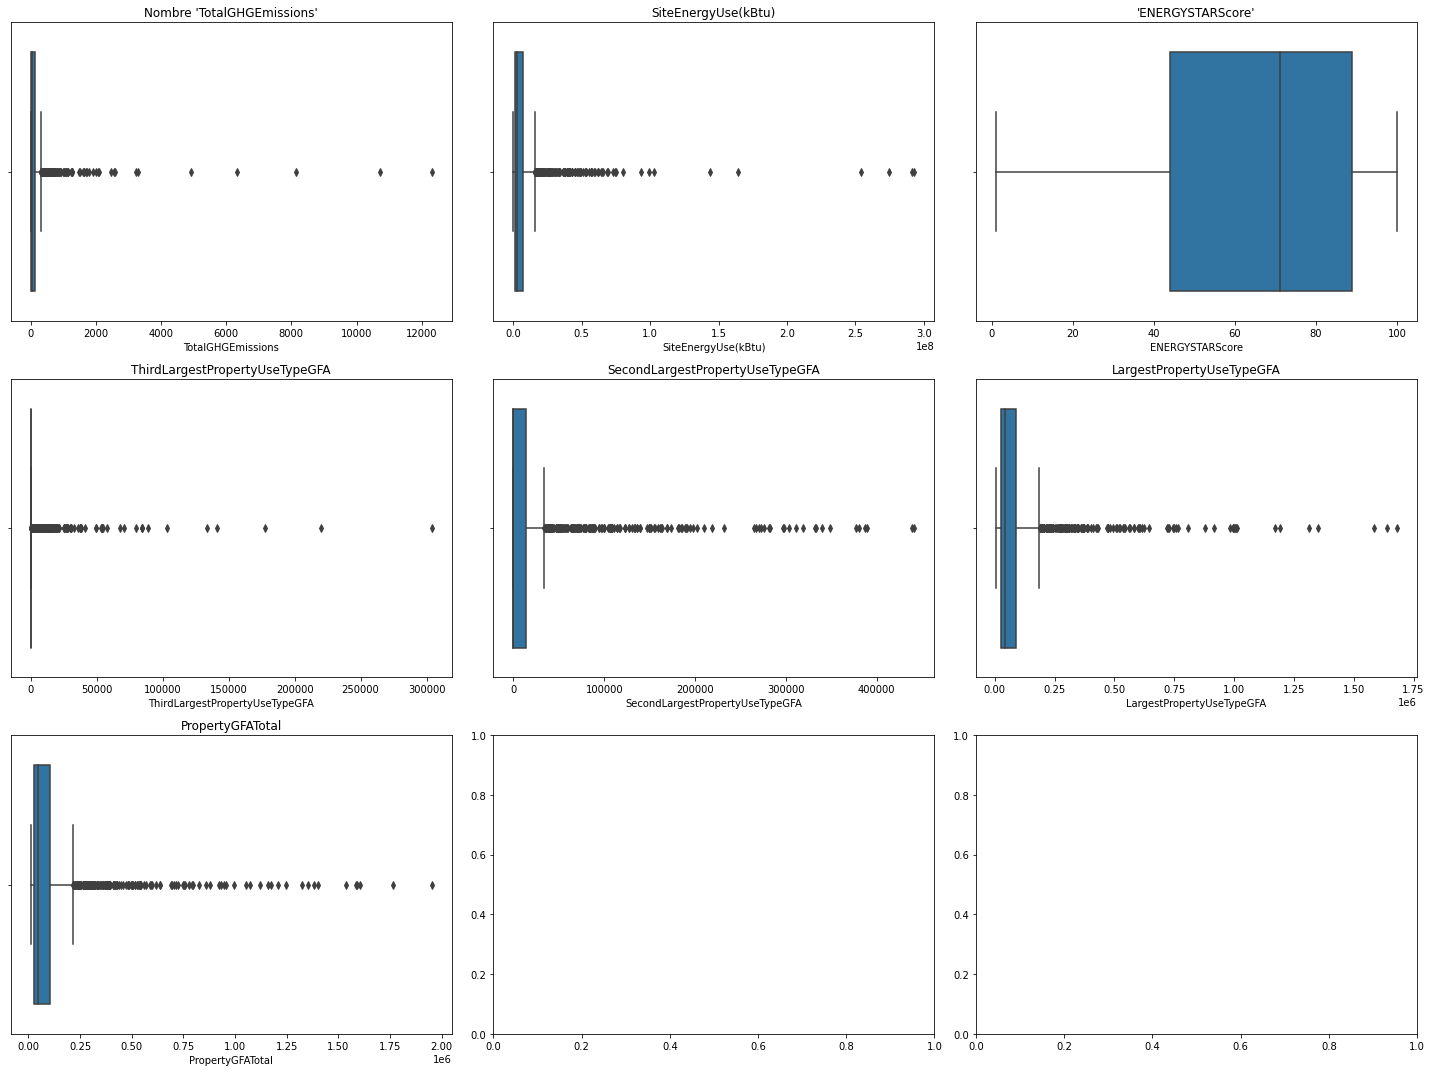

In [30]:
fig,axs=plt.subplots(3,3,tight_layout=True,figsize=(20,15))
sns.boxplot(ax=axs[0,0],x=data_filtre['TotalGHGEmissions'])
axs[0,0].set_title("Nombre 'TotalGHGEmissions'")
sns.boxplot(ax=axs[0,1],x=data_filtre['SiteEnergyUse(kBtu)'])
axs[0,1].set_title("SiteEnergyUse(kBtu)")
sns.boxplot(ax=axs[0,2],x=data_filtre['ENERGYSTARScore'])
axs[0,2].set_title("'ENERGYSTARScore'")
sns.boxplot(ax=axs[1,0],x=data_filtre['ThirdLargestPropertyUseTypeGFA'])
axs[1,0].set_title("ThirdLargestPropertyUseTypeGFA")
sns.boxplot(ax=axs[1,1],x=data_filtre['SecondLargestPropertyUseTypeGFA'])
axs[1,1].set_title("SecondLargestPropertyUseTypeGFA")
sns.boxplot(ax=axs[1,2],x=data_filtre['LargestPropertyUseTypeGFA'])
axs[1,2].set_title("LargestPropertyUseTypeGFA")
sns.boxplot(ax=axs[2,0],x=data_filtre['PropertyGFATotal'])
axs[2,0].set_title("PropertyGFATotal")




### Analyse des variables intéressantes pour l'étude

- Consommation d'énergie par bâtiment ```SiteEnergyUse(kBtu)```
- Emissions de gaz à effet de serre ```TotalGHGEmissions```

In [31]:
print(data_filtre['SiteEnergyUse(kBtu)'].isnull().sum())
print(data_filtre['TotalGHGEmissions'].isnull().sum())

0
0


### ``` Distributions : ```

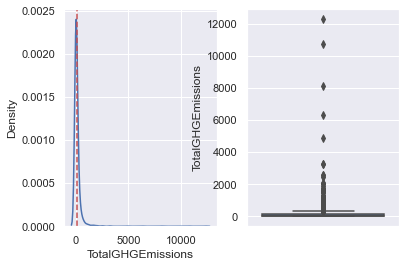

In [32]:
sns.set()
mean = data_filtre['TotalGHGEmissions'].mean()
fig, ax = plt.subplots(1, 2)
sns.kdeplot(data=data_filtre, x="TotalGHGEmissions", ax=ax[0])
ax[0].axvline(mean, color='r', linestyle='--')
sns.boxplot(y="TotalGHGEmissions", data=data_filtre, ax=ax[1])
plt.show()

- Variations très importantes autour de 0 -> on passe au log (transformation logarithmique)

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot')

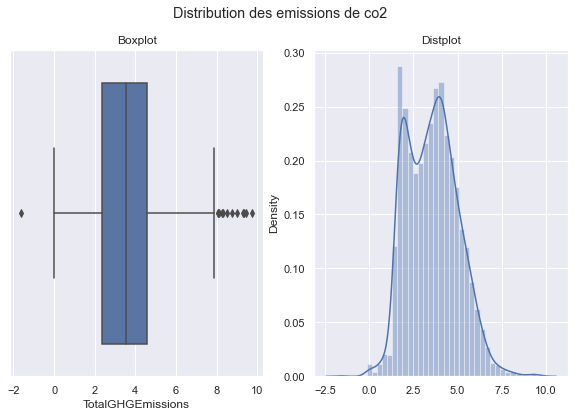

In [33]:
# Distribution des emissions de co2

f, axes = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Distribution des emissions de co2")
ax1 = sns.boxplot(x=np.log1p(data['TotalGHGEmissions']), ax=axes[0])
ax1.set_title("Boxplot")
ax2 = sns.distplot(x=np.log1p(data['TotalGHGEmissions']), ax=axes[1])
ax2.set_title("Distplot")

*Consommation d'energie:

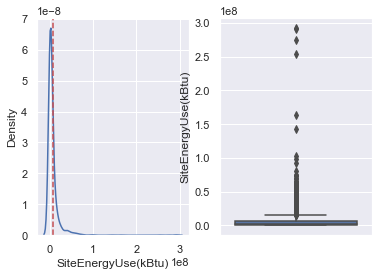

In [34]:
sns.set()
mean = data_filtre['SiteEnergyUse(kBtu)'].mean()
fig, ax = plt.subplots(1, 2)
sns.kdeplot(data=data_filtre, x="SiteEnergyUse(kBtu)", ax=ax[0])
ax[0].axvline(mean, color='r', linestyle='--')
sns.boxplot(y="SiteEnergyUse(kBtu)", data=data_filtre, ax=ax[1])
plt.show()

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot')

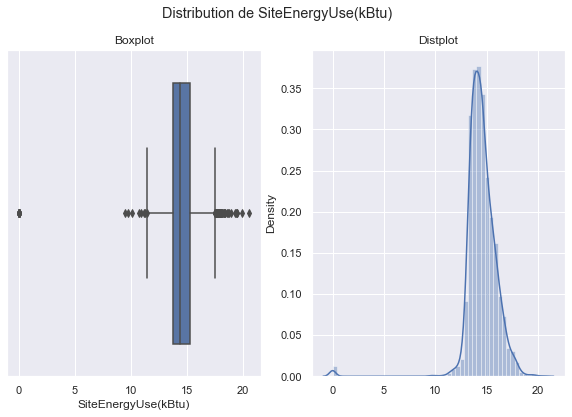

In [35]:
### Passage au log
f, axes = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Distribution de SiteEnergyUse(kBtu)")
ax1 = sns.boxplot(x=np.log1p(data['SiteEnergyUse(kBtu)']), ax=axes[0])
ax1.set_title("Boxplot")
ax2 = sns.distplot(x=np.log1p(data['SiteEnergyUse(kBtu)']), ax=axes[1])
ax2.set_title("Distplot")

In [37]:
# plt.style.use('ggplot')

# fig = plt.figure(1, figsize=(14, 8))
# for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
#     plt.subplot(2,2,i+1)
#     sns.distplot(data[label], bins=int(1 + np.log2(len(data))))
#     plt.subplot(2,2,i+3)
#     sns.boxplot(data_filtre[label], orient="v")
# plt.show()

c:\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python38\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


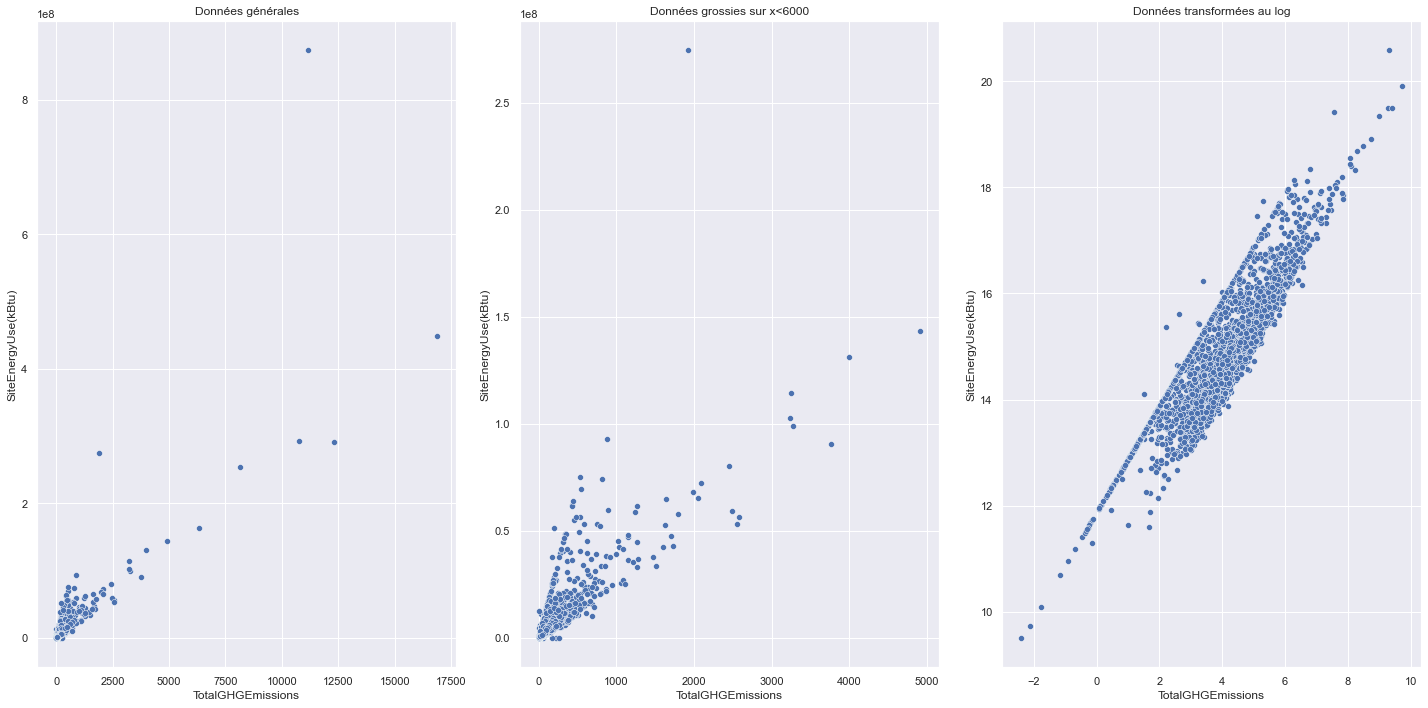

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

ax1.set_title("Données générales")
sns.scatterplot(data=data, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=ax1)
ax2.set_title("Données grossies sur x<6000")
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 6000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=ax2)
ax3.set_title("Données transformées au log")
sns.scatterplot(data=data, x=np.log(data["TotalGHGEmissions"]), y=np.log(data["SiteEnergyUse(kBtu)"]), ax=ax3)

fig.tight_layout()

On remarque  la présence de plusieurs droites de régression linéaire entre SiteEnergyUse(kBtu) et TotalGHGEmissions.

### Corrélations

#### Analyse multivariée:

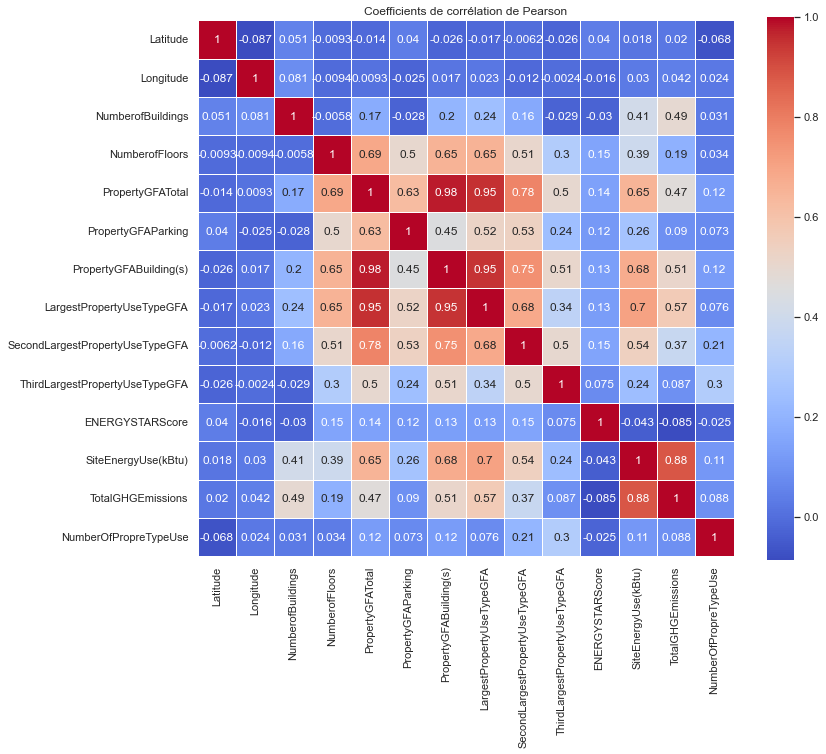

In [37]:
corr_mat = data_filtre.select_dtypes(include = ['float','int']).corr()
#heatmap
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, square=True, linewidths=1, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson")
plt.show()

In [38]:
corr = data.corr()
#display(corr)

In [39]:
threshold = 0.7
corr_pairs = corr.unstack().sort_values()
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
108,Electricity(kBtu),Electricity(kWh),1.000000
76,NaturalGas(therms),NaturalGas(kBtu),1.000000
74,SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),0.994317
72,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),0.993549
70,PropertyGFATotal,PropertyGFABuilding(s),0.989823
68,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),0.978422
66,LargestPropertyUseTypeGFA,PropertyGFATotal,0.974113
64,Electricity(kWh),SiteEnergyUse(kBtu),0.956556
62,SiteEnergyUse(kBtu),Electricity(kBtu),0.956556
60,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.944141


c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

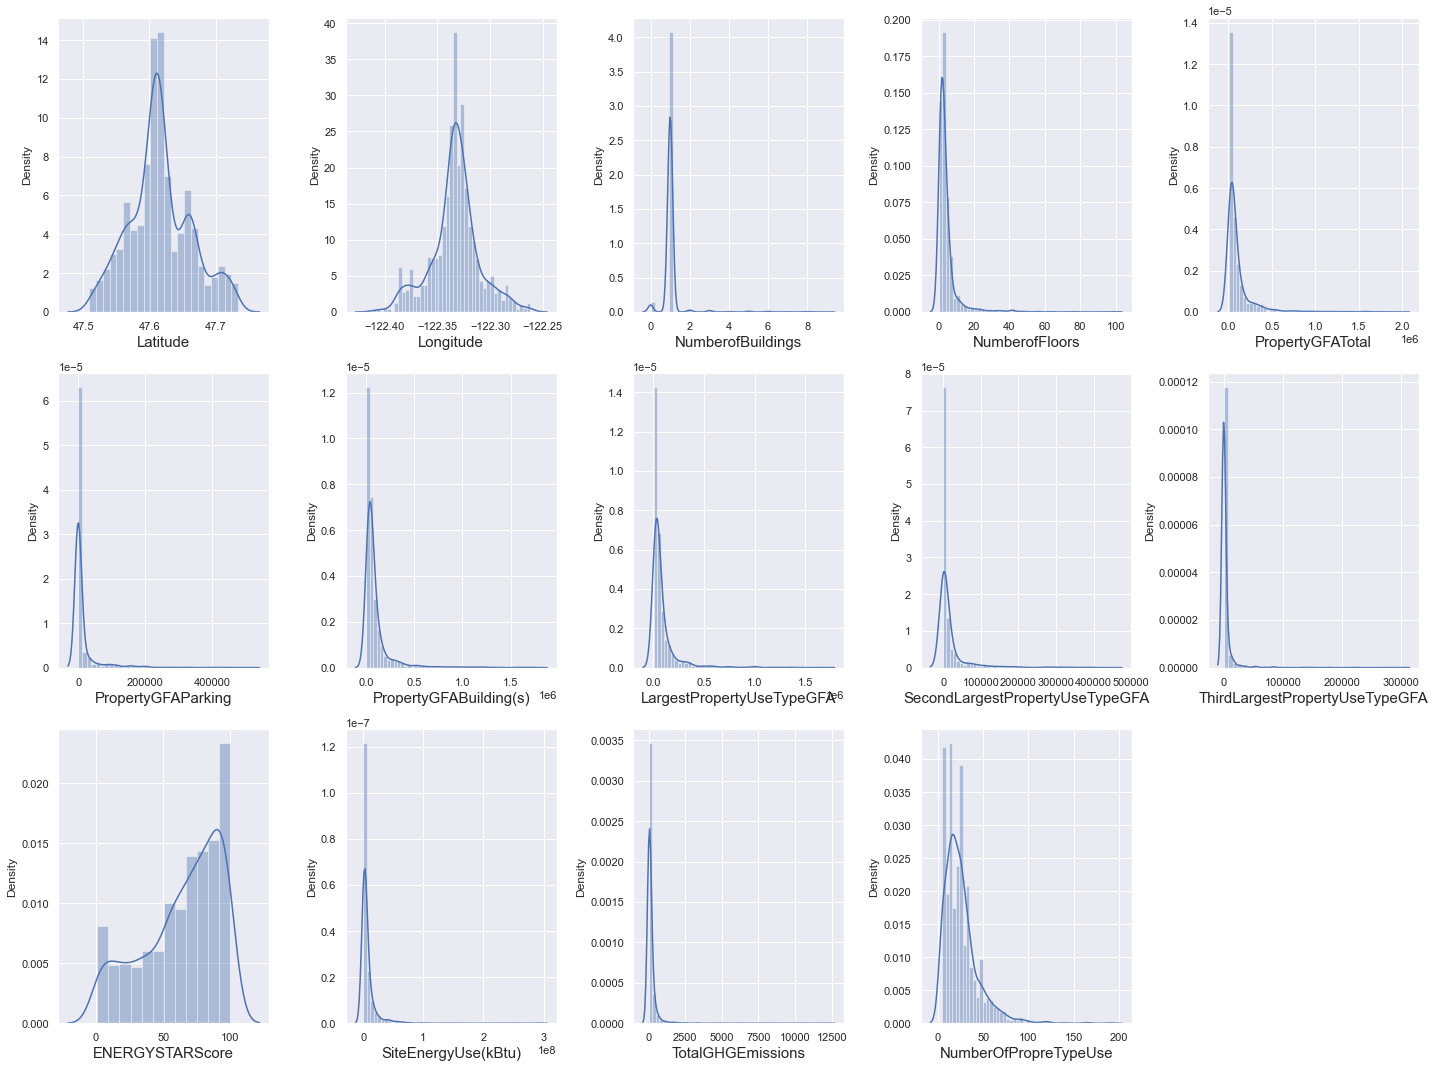

In [40]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data_filtre.select_dtypes(include=['float','int']):
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data_filtre.select_dtypes(include = ['float','int'])[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

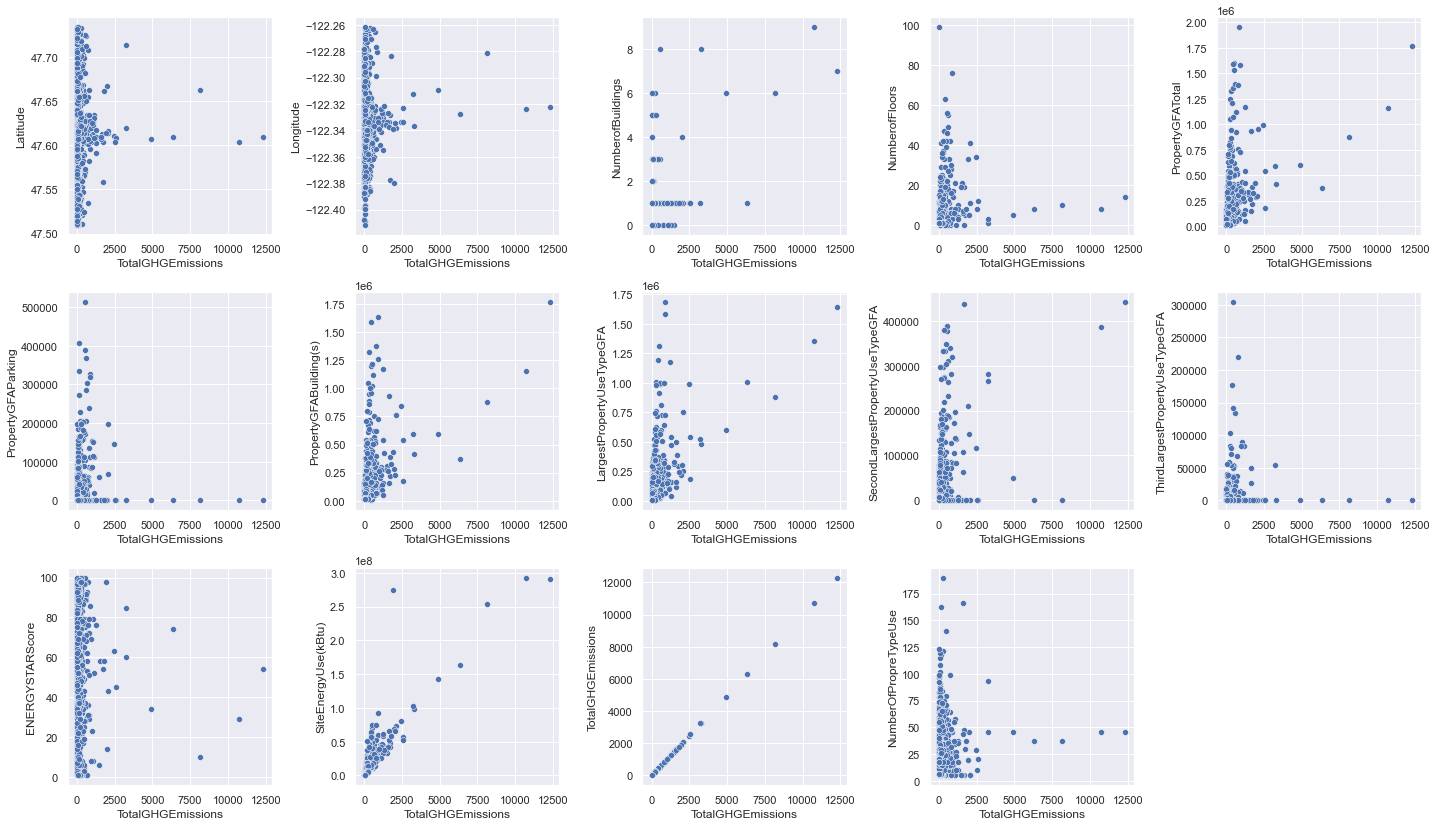

In [41]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in data_filtre.select_dtypes(include = ['float','int']):
    if plotnumber <= 18:
        ax = plt.subplot(4, 5, plotnumber)
        sns.scatterplot(x =(data_filtre.select_dtypes(include = ['float','int'])['TotalGHGEmissions']), y = data_filtre.select_dtypes(include = ['float','int'])[column])
        
    plotnumber += 1
plt.tight_layout()
plt.show()

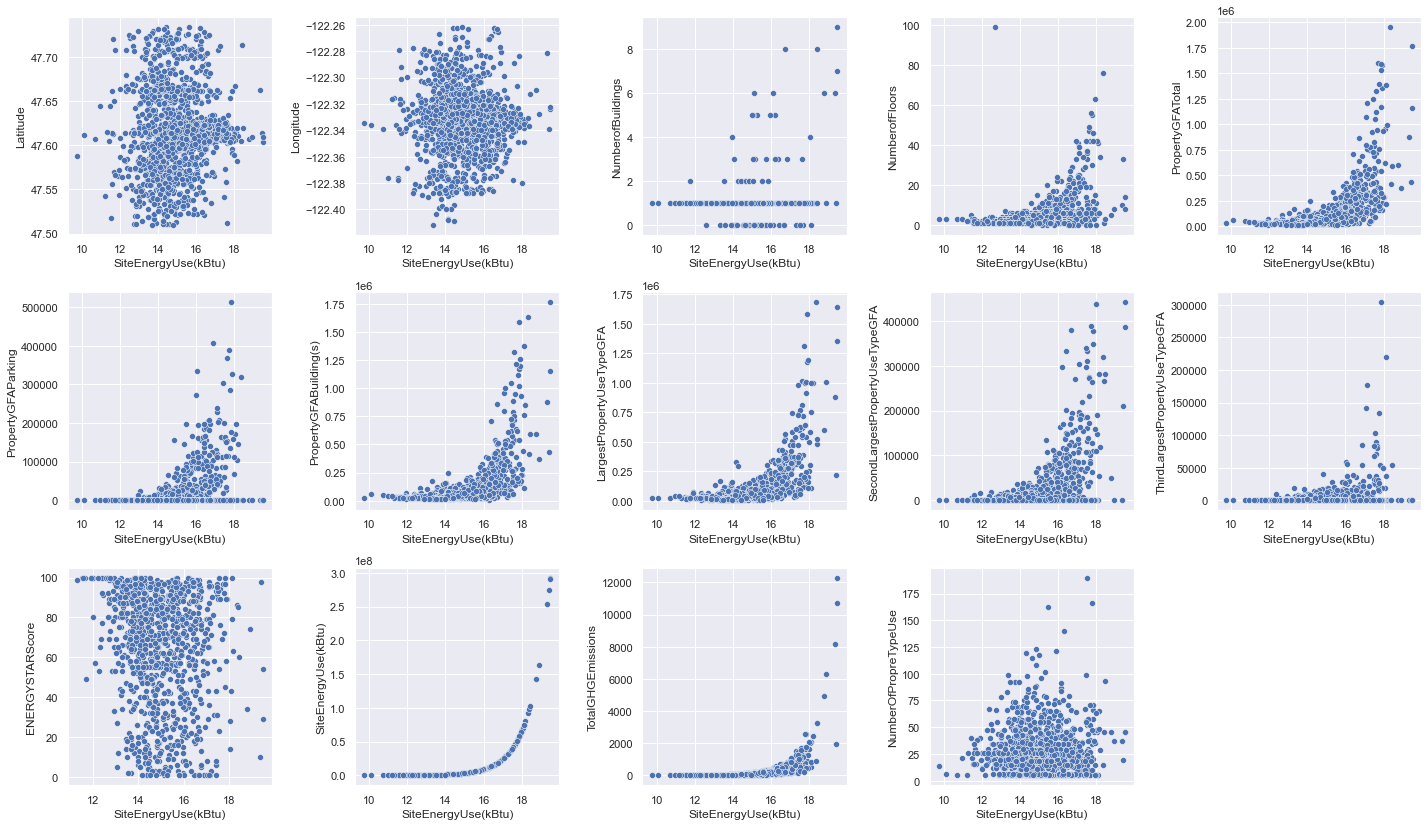

In [42]:
# avec la forme logarithemique:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in data_filtre.select_dtypes(include = ['float','int']):
    if plotnumber <= 18:
        ax = plt.subplot(4, 5, plotnumber)
        sns.scatterplot(x = np.log(data_filtre.select_dtypes(include = ['float','int'])['SiteEnergyUse(kBtu)']), y = data_filtre.select_dtypes(include = ['float','int'])[column])
        
    plotnumber += 1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='SiteEnergyUse(kBtu)'>

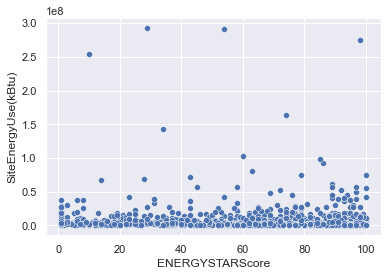

In [52]:
sns.scatterplot(x = data_filtre['ENERGYSTARScore'], y =(data_filtre['SiteEnergyUse(kBtu)']) )

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='TotalGHGEmissions'>

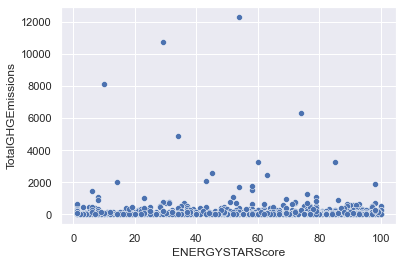

In [55]:
sns.scatterplot(x = data_filtre['ENERGYSTARScore'], y =(data_filtre['TotalGHGEmissions']) )

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='Count'>

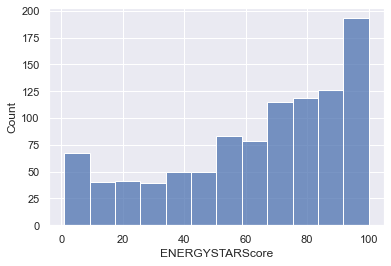

In [54]:
sns.histplot(x = data_filtre['ENERGYSTARScore'])

### vérification de la normalité des variables:

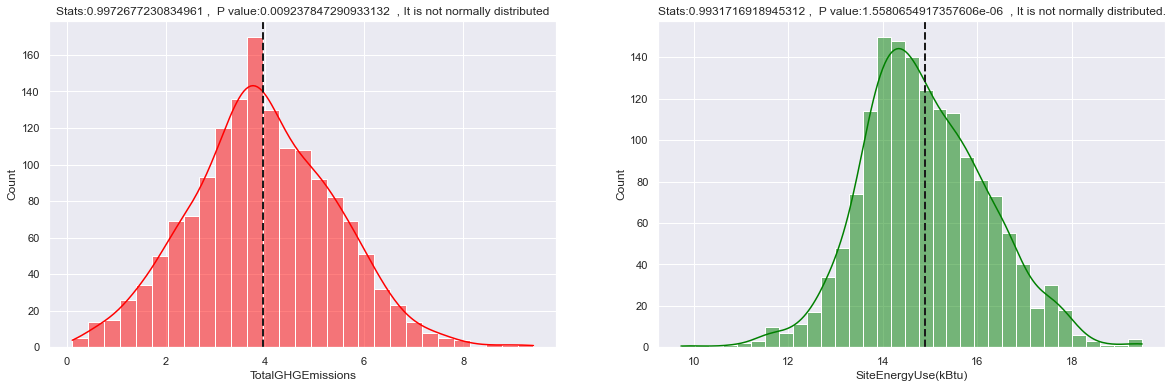

In [43]:
from scipy.stats import shapiro

stat1, p1 = shapiro(np.log(data_filtre['TotalGHGEmissions']))
stat2, p2 = shapiro(np.log1p(data_filtre['SiteEnergyUse(kBtu)']))


if p1 > 0.05:
    s1 = 'It is normally distributed.'
else:
    s1 = 'It is not normally distributed'
    
if p2 > 0.05:
    s2 = 'It is normally distributed.'
else:
    s2 = 'It is not normally distributed.'

plt.figure(figsize=(20,6))
  
plt.subplot(121)
sns.histplot(np.log1p(data_filtre['TotalGHGEmissions']),kde=True, color='red')
plt.axvline(np.log1p(data_filtre['TotalGHGEmissions']).mean(), color='k', linestyle='dashed', linewidth=2)

plt.title("Stats:"+ str(stat1)+" ,  P value:" + str(p1)+ "  , " + s1)

plt.subplot(122)
sns.histplot(np.log(data_filtre['SiteEnergyUse(kBtu)']),kde=True, color='green')
plt.axvline(np.log(data_filtre['SiteEnergyUse(kBtu)']).mean(), color='k', linestyle='dashed', linewidth=2)

plt.title("Stats:"+ str(stat2)+" ,  P value:" + str(p2)+ "  , " + s2)


plt.show() 


    

In [44]:
data_filtre.select_dtypes('object').columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType'],
      dtype='object')

In [45]:
data_filtre.shape

(1536, 20)

In [49]:
data_filtre.to_csv("C:/Users/Lynda/Desktop/anticipez les besoins en consommation de batiment/data_filtre.csv",index=False)
data_filtre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 0 to 3375
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1536 non-null   object 
 1   PrimaryPropertyType              1536 non-null   object 
 2   Neighborhood                     1536 non-null   object 
 3   Latitude                         1536 non-null   float64
 4   Longitude                        1536 non-null   float64
 5   NumberofBuildings                1536 non-null   float64
 6   NumberofFloors                   1536 non-null   int64  
 7   PropertyGFATotal                 1536 non-null   int64  
 8   PropertyGFAParking               1536 non-null   int64  
 9   PropertyGFABuilding(s)           1536 non-null   int64  
 10  LargestPropertyUseType           1536 non-null   object 
 11  LargestPropertyUseTypeGFA        1536 non-null   float64
 12  SecondLargestPropert